# 1️⃣ Insurance costs are different for each person based on factors like age, health, and lifestyle. With machine learning, we can predict these costs using data. This helps make better financial and business decisions.

# 2️⃣ Project Objective

- Build a machine learning model to predict insurance costs
- Find which factors affect cost most
- Check model performance

# 3️⃣ Import Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

# 4️⃣ Load the Dataset

In [80]:
df= pd.read_csv(r"C:\Users\sad57\Desktop\DataSets\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 5️⃣ Exploratory Data Analysis (EDA)

In [84]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [85]:
df.duplicated().sum()

1

In [86]:
df.drop_duplicates(inplace=True)

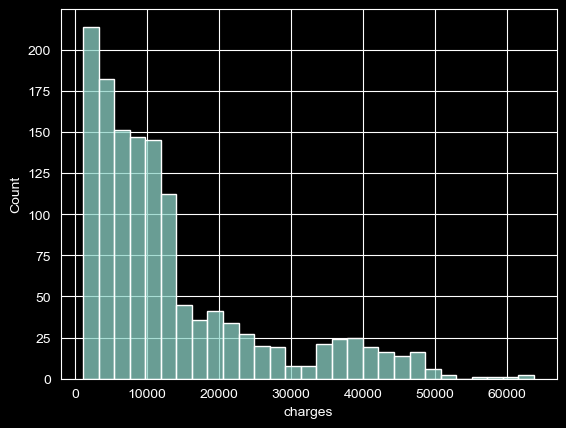

In [87]:
sns.histplot(df, x= 'charges')
plt.show()

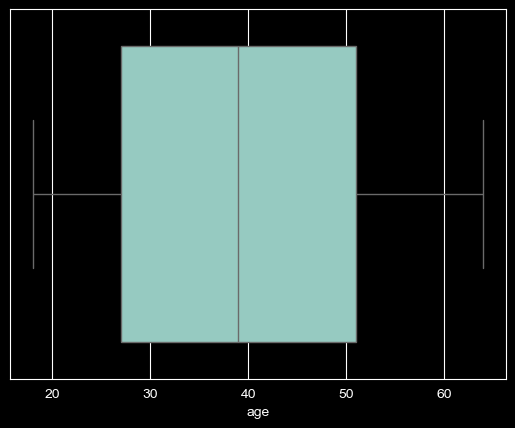

In [88]:
sns.boxplot(df, x= 'age')
plt.show()

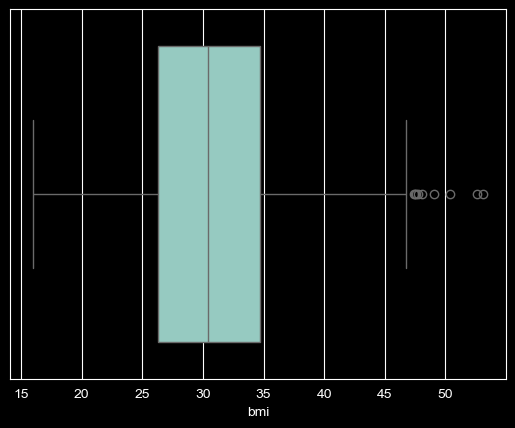

In [89]:
sns.boxplot(df, x= 'bmi')
plt.show()

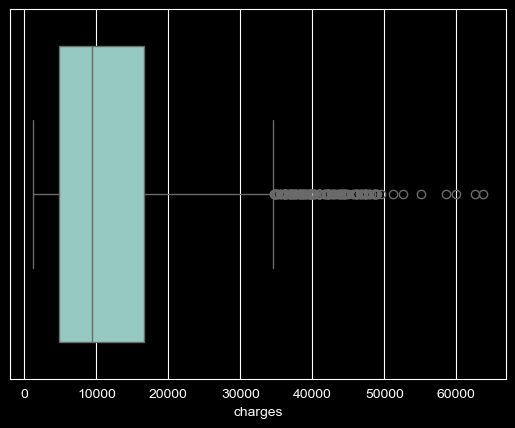

In [90]:
sns.boxplot(df, x= 'charges')
plt.show()

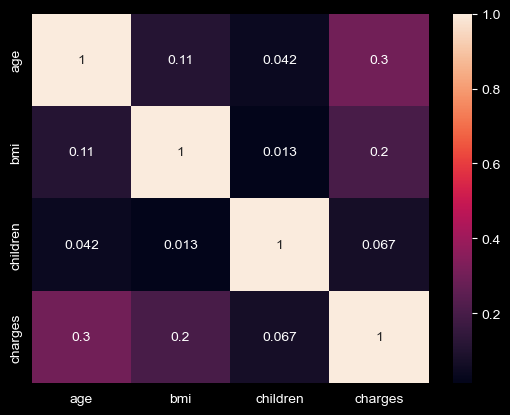

In [91]:
df_numerics= df[['age', 'bmi', 'children' ,'charges']]
sns.heatmap(df_numerics.corr(), annot=True)
plt.show()

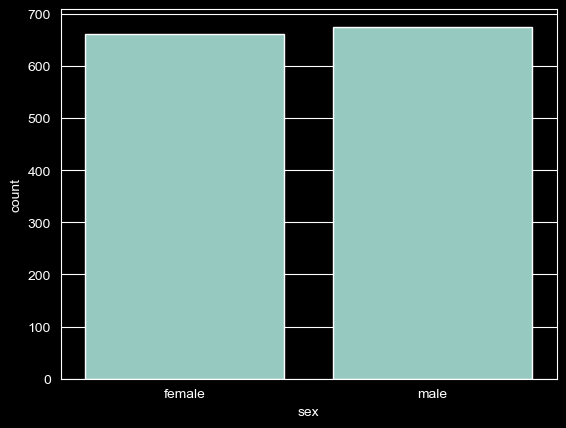

In [92]:
sns.countplot(df, x= 'sex')
plt.show()

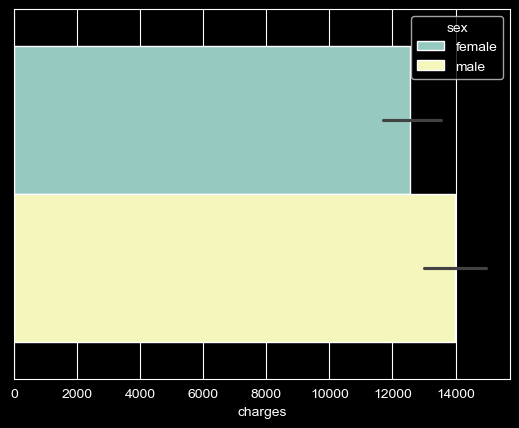

In [93]:
sns.barplot(df, x= 'charges', hue= 'sex')
plt.show()

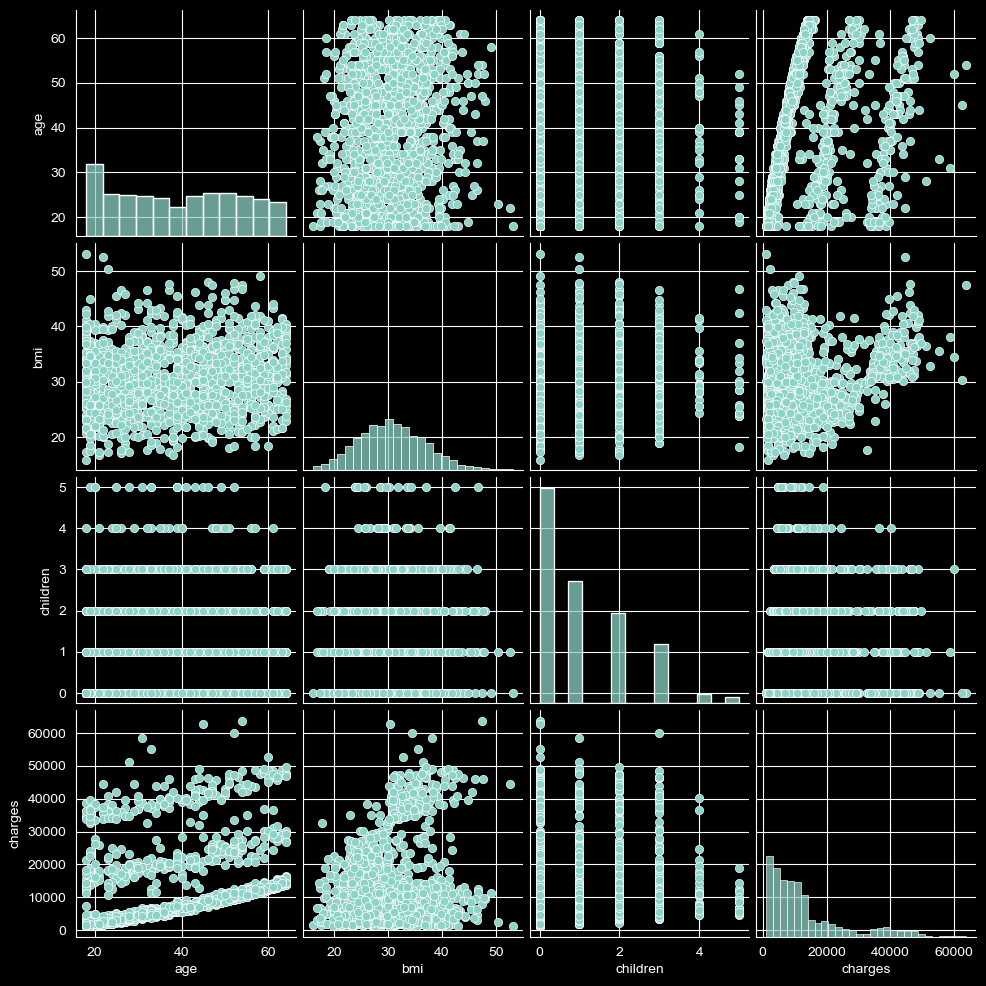

In [94]:
sns.pairplot(df)
plt.show()

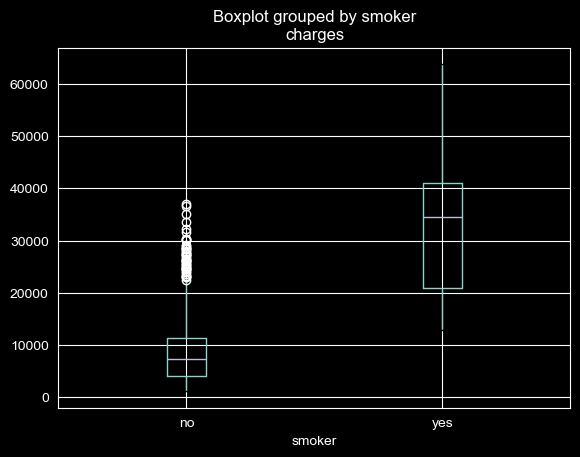

In [95]:
df.boxplot(column='charges', by='smoker')
plt.show()

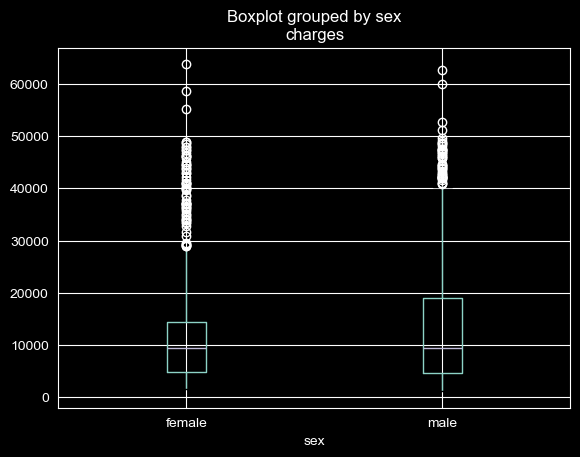

In [96]:
df.boxplot(column='charges', by='sex')
plt.show()

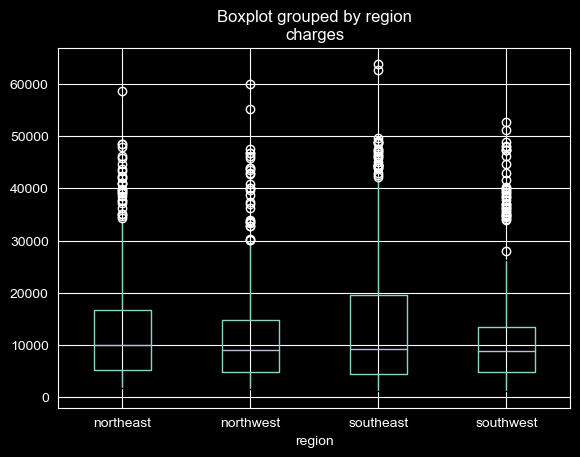

In [97]:
df.boxplot(column='charges', by='region')
plt.show()

# 6️⃣ Data Preprocessing

## i. Encoding

In [57]:
encoder= LabelEncoder()

In [99]:
df['sex']= encoder.fit_transform(df['sex'])
df['smoker']= encoder.fit_transform((df['smoker']))
df['region']= encoder.fit_transform(df['region'])

In [100]:
df[['sex', 'smoker', 'region']]

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1
...,...,...,...
1333,1,0,1
1334,0,0,0
1335,0,0,2
1336,0,0,3


## ii. Feature Selection

In [60]:
X= df.drop('charges', axis=1)

In [61]:
y = df["charges"]

In [62]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [63]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

## iii. 🔹 Train-Test Split

In [64]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Model Building (Linear Regression)

In [65]:
model = LinearRegression()

In [66]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
model.coef_

array([  248.76407134,   -99.69539417,   312.60904469,   534.12087654,
       23052.15275173,  -237.62514748])

In [68]:
model.intercept_

-11047.686556720186

In [69]:
y_pred= model.predict(X_test)

# 8️⃣ Model Evaluation

In [70]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

MAE: 4182.353155288296
RMSE: 5957.608799816459
R² Score: 0.8068466322629111


In [71]:
error = y_test - y_pred

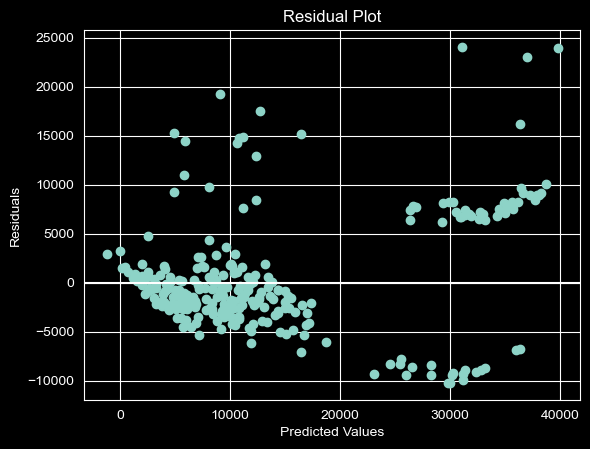

In [72]:
plt.scatter(y_pred, error)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# 🔟 Polynomial Regression

## i. choose best degree

In [77]:
for i in range(1, 11):
    best_degree = 1
    poly = PolynomialFeatures(degree=i)
    X_poly= poly.fit_transform(X)
    model= LinearRegression()

    scores= cross_val_score(model, X_poly, y, scoring="neg_mean_squared_error", cv=5)
    rmse= np.sqrt(-scores.mean())
    print(f"Degree {i}: RMSE = {rmse}")
    if rmse < best_degree :
        best_degree


Degree 1: RMSE = 0.4464304876405971
Degree 2: RMSE = 0.3730961083279181
Degree 3: RMSE = 0.3756603954283901
Degree 4: RMSE = 0.40012347120958885
Degree 5: RMSE = 0.5660751222133609
Degree 6: RMSE = 3.757729371156937
Degree 7: RMSE = 5.27613050776521
Degree 8: RMSE = 9.223488163523616
Degree 9: RMSE = 15.133766031290001
Degree 10: RMSE = 17.065963093341367


In [73]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [74]:
X_train_poly= poly.fit_transform(X_train)
X_train_poly

array([[ 1., 23.,  1., ...,  0.,  0.,  0.],
       [ 1., 21.,  1., ...,  0.,  0.,  0.],
       [ 1., 52.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 20.,  1., ...,  0.,  0.,  9.],
       [ 1., 38.,  0., ...,  0.,  0.,  9.],
       [ 1., 35.,  0., ...,  0.,  0.,  4.]])

In [75]:
X_test_poly = poly.transform(X_test)
X_test_poly

array([[ 1., 49.,  1., ...,  0.,  0.,  0.],
       [ 1., 29.,  0., ...,  0.,  0.,  9.],
       [ 1., 51.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 22.,  0., ...,  0.,  0.,  0.],
       [ 1., 61.,  1., ...,  1.,  3.,  9.],
       [ 1., 47.,  0., ...,  0.,  0.,  0.]])

In [20]:
model= LinearRegression()

In [21]:
model.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred = model.predict(X_test_poly)

In [23]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

MAE: 2729.5001336395176
RMSE: 4551.132385233191
R² Score: 0.8665830903164841


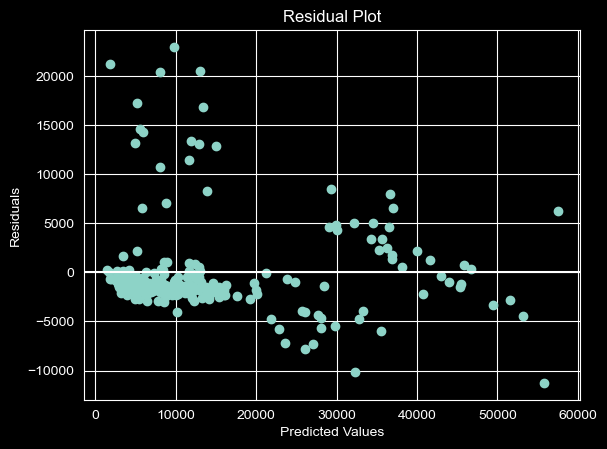

In [24]:
error= y_test - y_pred
plt.scatter(y_pred, error)
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [138]:
import joblib
joblib.dump(model, 'insurance_model.pkl')

['insurance_model.pkl']

In [135]:
x_new = [[19, 0, 27, 0, 1, 3]]

In [136]:
x_new_poly = poly.transform(x_new)
prediction = model.predict(x_new_poly)
print(prediction)

[22411.61706884]


C:\Users\sad57\anaconda3\envs\tf_GPU\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
